# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# **Loading the dataset**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nidakhairunnisa/Retail_6/main/Sample%20-%20Superstore.csv', encoding='windows-1254')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


# **Pre-processing**

In [ ]:
# memperbaiki tipe data waktu
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
# mengganti spasi(" ") menjadi underscore ("_")
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

## **Korelasi antar variable (numerikal)**

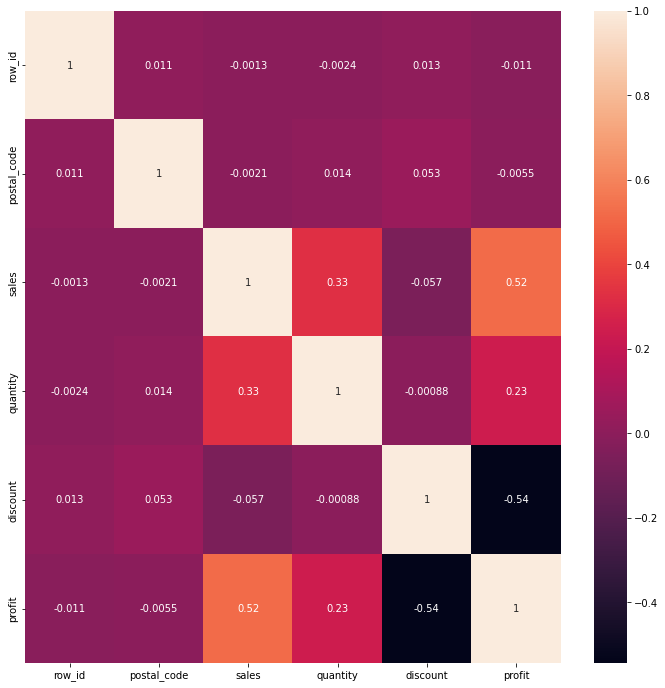

In [ ]:
#pearson (tidak sensitif outlier)
#spearman (sensitif outlier)

correlation = df.corr(method='spearman') 

plt.figure(figsize=(12, 12))
sns.heatmap(correlation, annot=True) #annot(annotasi) agar tahu valuenya berapa
plt.show()

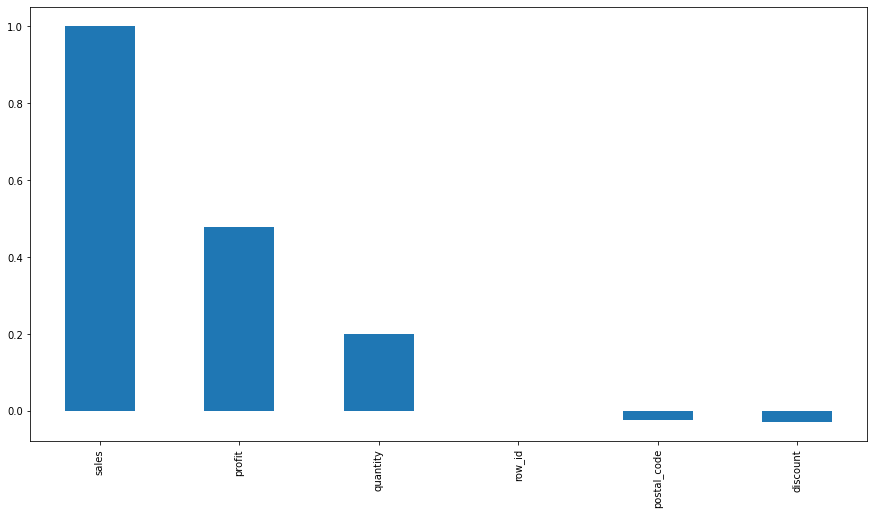

In [ ]:
plt.figure(figsize=(15,8))
df.corr()['sales'].sort_values(ascending = False).plot(kind='bar') 

## **Feature Engineering**

In [ ]:
sales_data=df[['order_date','sales']]
sales_data=sales_data.sort_values('order_date')
sales_data.head()

,order_date,sales
7980,2014-01-03,16.448
739,2014-01-04,11.784
740,2014-01-04,272.736
741,2014-01-04,3.540
1759,2014-01-05,19.536


In [ ]:
# lihat penjualan perhari

sales_data=sales_data.groupby(['order_date'])[['sales']].sum().reset_index()
sales_data

,order_date,sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
...,...,...
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340


In [ ]:
# buatlah tanggal menjadi index
sales_data=sales_data.set_index('order_date')
sales_data.head(20)

,sales
order_date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158
2014-01-09,40.544
2014-01-10,54.830
2014-01-11,9.940
2014-01-13,3553.795


Terdapat tanggal yang kosong seperti tanggal 08-01-2014. Hal ini dapat diatasi dengan 2 cara sebagai berikut : 
terdapat dua cara handling data yang kosong
1. Interpolate data
2. Forecast bulanan

Pada enelitian ini akan dilakukan forecasting bulanan, maka dari itu untuk mengatasi tanggal yang kosong penjualannya akan dilakukan downsampling data menjadi data penjualan perbulan.

In [ ]:
# Down sample to monthly frequency

sales_data=sales_data.resample('MS').mean()
sales_data

,sales
order_date,
2014-01-01,647.131591
2014-02-01,225.994600
2014-03-01,2320.458708
2014-04-01,1178.972708
2014-05-01,844.581679
2014-06-01,1383.805104
2014-07-01,1414.433042
2014-08-01,1162.894521
2014-09-01,2920.619671


In [ ]:
sales_data.shape

(48, 1)

# **Regression**

## **Lag features**

Lag features dapat menggeser pengamatan dari rangkaian target sehingga tampak terjadi di kemudian hari. Di sini dapat membuat fitur jeda 1 langkah, meskipun pergeseran dengan beberapa langkah juga dimungkinkan

In [ ]:
sales_data['Lag_1'] = sales_data['sales'].shift(1)
sales_data.head()

,sales,Lag_1
order_date,,
2014-01-01,647.131591,NaN
2014-02-01,225.994600,647.131591
2014-03-01,2320.458708,225.994600
2014-04-01,1178.972708,2320.458708
2014-05-01,844.581679,1178.972708


In [ ]:
sales_data.fillna({'Lag_1':0}, inplace=True)

In [ ]:
sales_data

,sales,Lag_1
order_date,,
2014-01-01,647.131591,0.000000
2014-02-01,225.994600,647.131591
2014-03-01,2320.458708,225.994600
2014-04-01,1178.972708,2320.458708
2014-05-01,844.581679,1178.972708
2014-06-01,1383.805104,844.581679
2014-07-01,1414.433042,1383.805104
2014-08-01,1162.894521,1414.433042
2014-09-01,2920.619671,1162.894521


In [ ]:
X = sales_data.loc[:, ['Lag_1']]
X.dropna(inplace=True)
y = sales_data.loc[:, 'sales']  # create the target
y, X = y.align(X, join='inner')  # drop corresponding values in target

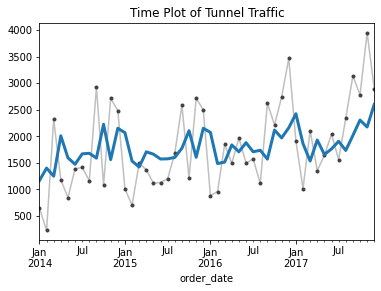

In [ ]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

ax = y.plot(**plot_params)
ax = y_pred1.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model_linearRegression = LinearRegression()
model_linearRegression.fit(X, y)

y_pred1 = pd.Series(model_linearRegression.predict(X), index=X.index)

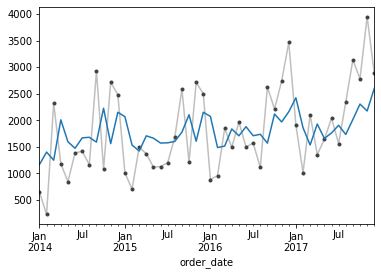

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred1.plot()

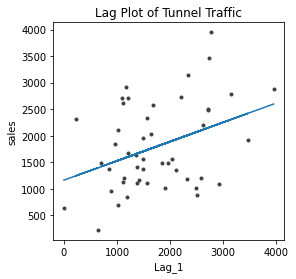

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred1)
ax.set_aspect('equal')
ax.set_ylabel('sales')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

## **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForest = RandomForestRegressor()
model_RandomForest.fit(X, y)

y_pred2 = pd.Series(model_RandomForest.predict(X), index=X.index)

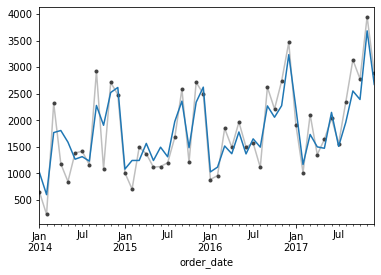

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred2.plot()

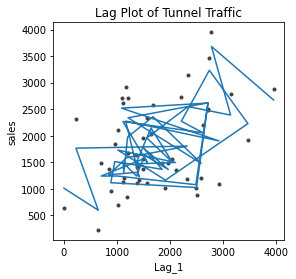

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred2)
ax.set_aspect('equal')
ax.set_ylabel('sales')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

## **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 7)
X_poly = poly_reg.fit_transform(X)
model_linearRegression.fit(X_poly, y)

y_pred4 = pd.Series(model_linearRegression.predict(X_poly), index=X.index)

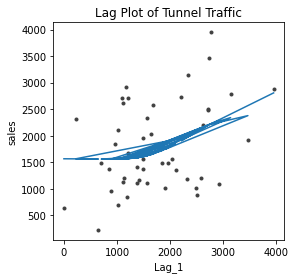

In [ ]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred4)
ax.set_aspect('equal')
ax.set_ylabel('sales')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic');

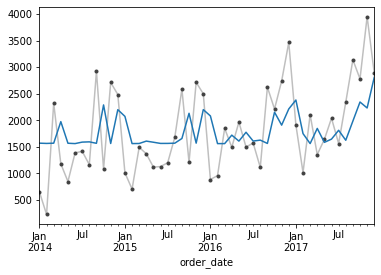

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred4.plot()

## MSE & RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_rf= mean_squared_error(y,y_pred2)
mse_lr= mean_squared_error(y,y_pred1)
mse_poly= mean_squared_error(y,y_pred4)
rmse_rf=sqrt(mean_squared_error(y,y_pred2))
rmse_lr=sqrt(mean_squared_error(y,y_pred1))
rmse_poly=sqrt(mean_squared_error(y,y_pred4))


In [ ]:
print('Mean Squared Error for Linear Regression Model is:',mse_lr)
print('Root Mean Squared Error for Linear Regression Model is:',rmse_lr)
print('Mean Squared Error for Random Forest Model is:',mse_rf)
print('Root Mean Squared Error for Random Forest Model is:',rmse_rf)
#print('Mean Squared Error for Decision Tree Model is:',mse_dt)
#print('Root Mean Squared Error for Decision Tree Model is:',rmse_dt)
print('Mean Squared Error for Polynomial Regression Model is:',mse_poly)
print('Root Mean Squared Error for Polynomial Regression Model is:',rmse_poly)

Mean Squared Error for Linear Regression Model is: 565670.2594212132
Root Mean Squared Error for Linear Regression Model is: 752.1105367040228
Mean Squared Error for Random Forest Model is: 114404.00963712043
Root Mean Squared Error for Random Forest Model is: 338.23661782415047
Mean Squared Error for Polynomial Regression Model is: 566040.4633961691
Root Mean Squared Error for Polynomial Regression Model is: 752.3566065345403


## **Actual VS Predictions**

In [ ]:
hasil = pd.DataFrame({
        'Actual Prices': np.array(y),
        'Predicted Prices': y_pred2}).head(8)

hasil

,Actual Prices,Predicted Prices
order_date,,
2014-01-01,647.131591,1014.045138
2014-02-01,225.994600,597.991843
2014-03-01,2320.458708,1767.042341
2014-04-01,1178.972708,1805.863212
2014-05-01,844.581679,1586.744200
2014-06-01,1383.805104,1265.788288
2014-07-01,1414.433042,1313.552100
2014-08-01,1162.894521,1230.333135


# **Komparasi**

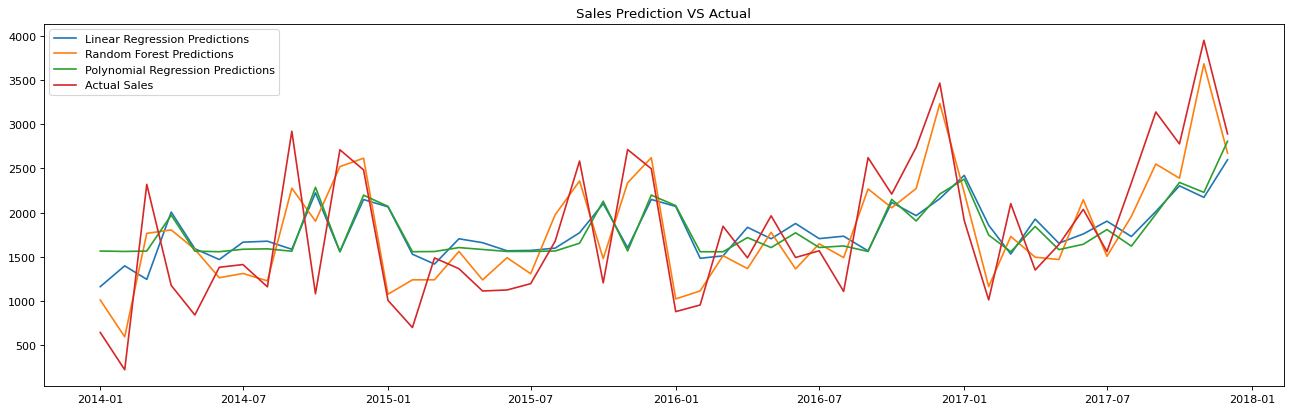

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)
plt.plot(y_pred1,label='Linear Regression Predictions')
plt.plot(y_pred2,label='Random Forest Predictions')
plt.plot(y_pred4,label='Polynomial Regression Predictions')
plt.plot(y,label='Actual Sales')
plt.title("Sales Prediction VS Actual")
plt.legend(loc="upper left")
plt.show()